**EXERCISE ONE**

In [93]:
#import the pillow library
from PIL import Image

In [94]:
# read the image from the google drive path
image = Image.open('/content/drive/MyDrive/AI - Saksham Sharma (LEVEL 6)/camera_man.jpg').convert("RGB")

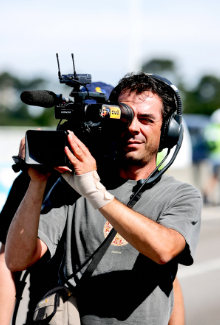

In [95]:
image.show()
# using display to show the image as image.show() doesn't work in colab
image.convert("RGB")
display(image)

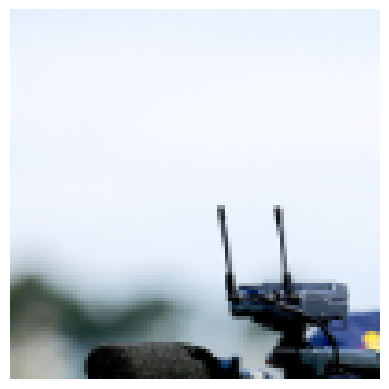

In [96]:
# import numpy  and matplot
import numpy as np
import matplotlib.pyplot as plt
#convert the image to array
image_array = np.array(image)

# slicing the first 100 rows and first 100 columns
top_left_corner = image_array[:100,:100]

# Display the cropped section, using plt to show as display do not render image for 3d array
plt.imshow(top_left_corner)
plt.axis("off")  # Hide axes
plt.show()

(-0.5, 219.5, 324.5, -0.5)

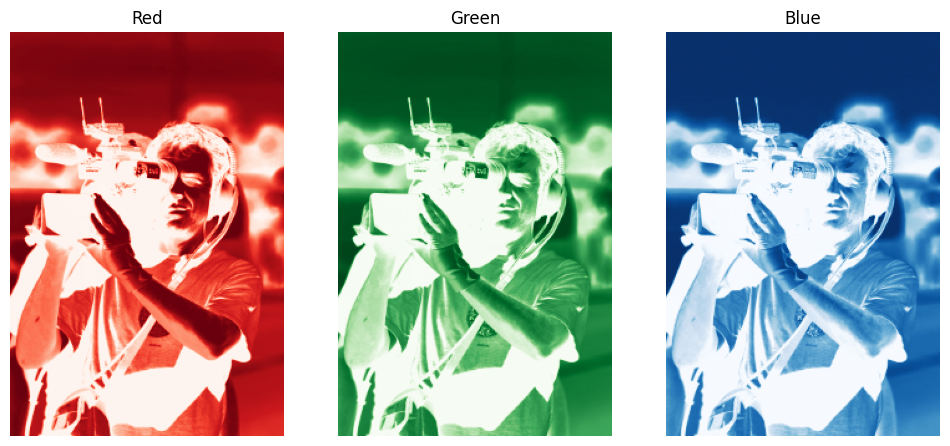

In [97]:
red_channel = image_array[:, :, 0]  # Red channel
green_channel = image_array[:, :, 1]  # Green channel
blue_channel = image_array[:, :, 2]  # Blue channel

plt.figure(figsize =(12,6))
plt.subplot(1,3,1)
plt.imshow(red_channel,cmap='Reds')
plt.title("Red")
plt.axis("off")
#Compressed image
plt.subplot(1,3,2)
plt.imshow(green_channel,cmap='Greens')
plt.title("Green")
plt.axis("off")
#Decompressed image
plt.subplot(1,3,3)
plt.imshow(blue_channel,cmap='Blues')
plt.title("Blue")
plt.axis("off")

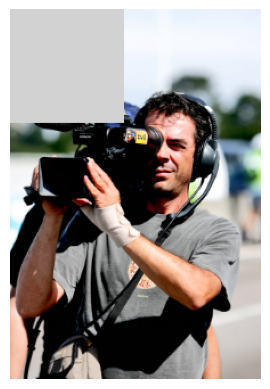

In [98]:
modified_image = image_array.copy()
modified_image[:100, :100, :] = [210, 210, 210]
plt.imshow(modified_image)
plt.axis("off")  # Hide axes
plt.show()


**EXERCISE TWO**

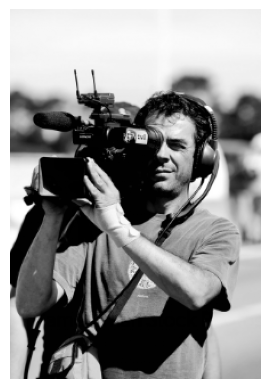

In [99]:
gray_scale = Image.open('/content/drive/MyDrive/AI - Saksham Sharma (LEVEL 6)/camera_man.jpg').convert('L')
plt.imshow(gray_scale,cmap='gray')
plt.axis("off")  # Hide axes
plt.show()


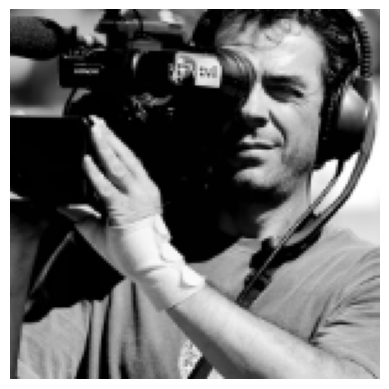

In [100]:
#get the width and height of the image
width,height = gray_scale.size
crop_size = 150
left = (width - crop_size) // 2
top = (height - crop_size) // 2
right = (width + crop_size) // 2
bottom = (height + crop_size) // 2
image_array = np.array(gray_scale)
cropped_image = image_array[top:bottom, left:right]
plt.imshow(cropped_image,cmap='gray')
plt.axis("off")  # Hide axes
plt.show()

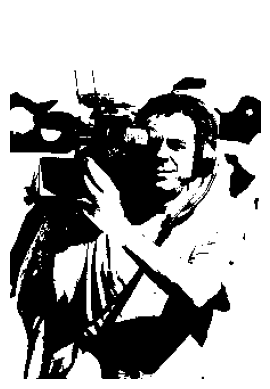

In [101]:
# np.where will return 255 for values greater than 100 else returns 0 , hence applying the threshold
threshold_img = np.where(image_array >100, 255,0)
plt.imshow(threshold_img,cmap='gray')
plt.axis("off")  # Hide axes
plt.show()

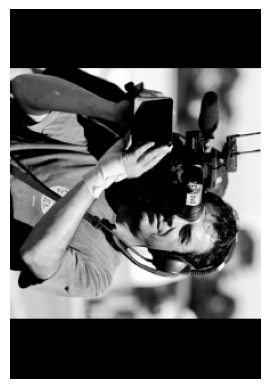

In [102]:
plt.imshow(gray_scale.rotate(-90),cmap='gray')
plt.axis("off")  # Hide axes
plt.show()

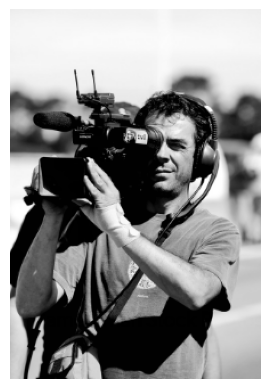

In [103]:
rgb_image = gray_scale.convert('RGB')
plt.imshow(rgb_image)
plt.axis("off")  # Hide axes
plt.show()


**EXERCISE THREE**

In [104]:
pca_img = Image.open('/content/drive/MyDrive/AI - Saksham Sharma (LEVEL 6)/lenna_image.png').convert('L')
img_array_pca = np.array(pca_img)
print(f'shape of the image: {img_array_pca.shape}')
mean = np.mean(img_array_pca)
img_array_pca_centered = img_array_pca - mean

cov_matrix = np.cov(img_array_pca_centered, rowvar = False)
eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)

shape of the image: (357, 366)


In [105]:
sorted_indice = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indice]
sorted_eigenvectors = eigenvectors[:, sorted_indice]

In [106]:
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

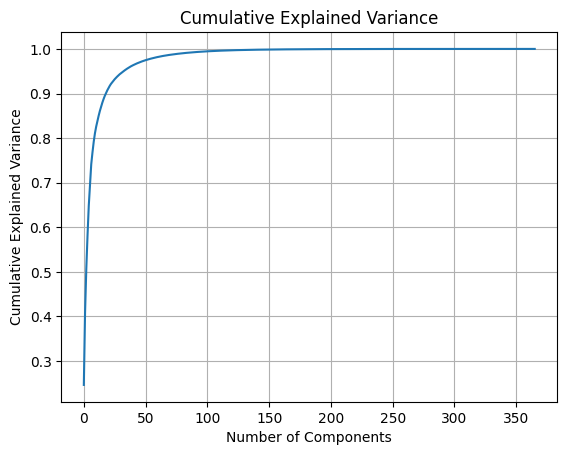

In [107]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

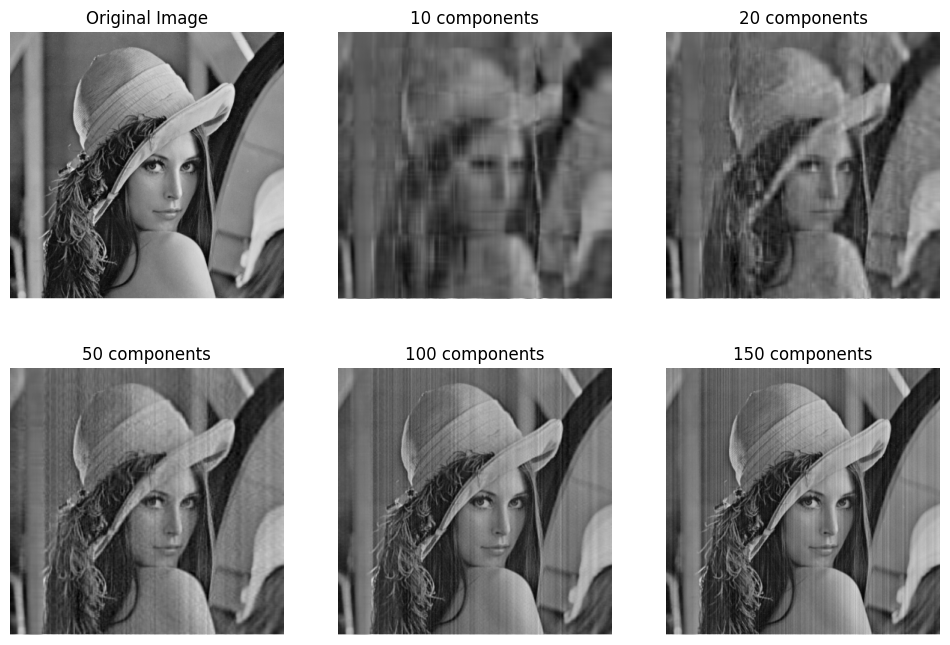

In [113]:
k_list = [10,20,50,100,150]
plt.figure(figsize =(12,8))
#Original image
plt.subplot(2,3,1)
plt.imshow(img_array_pca,cmap='gray')
plt.title("Original Image")
plt.axis("off")
for i,k in enumerate(k_list):
  components = sorted_eigenvectors[:,:k]
  compressed_data = np.dot(img_array_pca_centered, components)
  decompressed_data = np.dot(compressed_data, components.T) + mean

  #Decompressed image
  plt.subplot(2,3,i+2)
  plt.imshow(decompressed_data,cmap='gray')
  plt.title(f"{k} components")
  plt.axis("off")